# original image

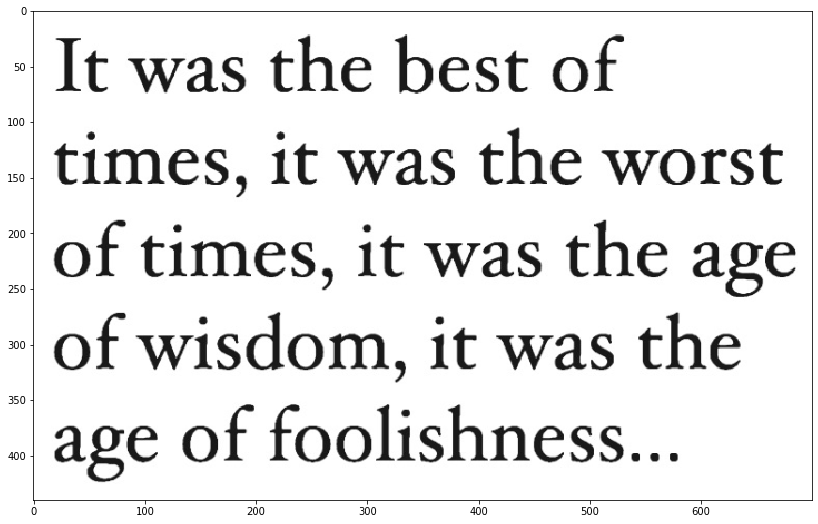

In [65]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd='C:\\Users\\Jayita\\AppData\\Local\\Tesseract-OCR\\tesseract.exe'

img_cv = cv2.imread('text.png')

# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img_cv)


# detecting text

In [66]:
print(pytesseract.image_to_string(img_rgb))

It was the best of
times, it was the worst
of times, it was the age
of wisdom, it was the
age of foolishness...



# detecting characters

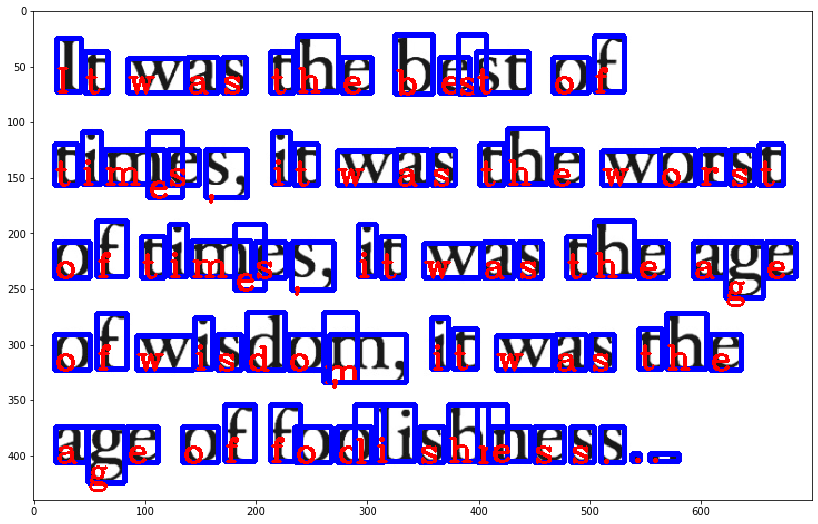

In [55]:
hImg, wImg, d  = img_rgb.shape
boxes = pytesseract.image_to_boxes(img_rgb)
for b in boxes.splitlines():
    b=b.split()
    #print(b)
    x,y,w,h = int(b[1]),int(b[2]),int(b[3]),int(b[4])
    cv2.rectangle(img_rgb,(x,hImg-y),(w,hImg-h),(0,0,255),3)
    cv2.putText(img_rgb,b[0],(x,hImg-y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    
plt.imshow(img_rgb)

# detecting words

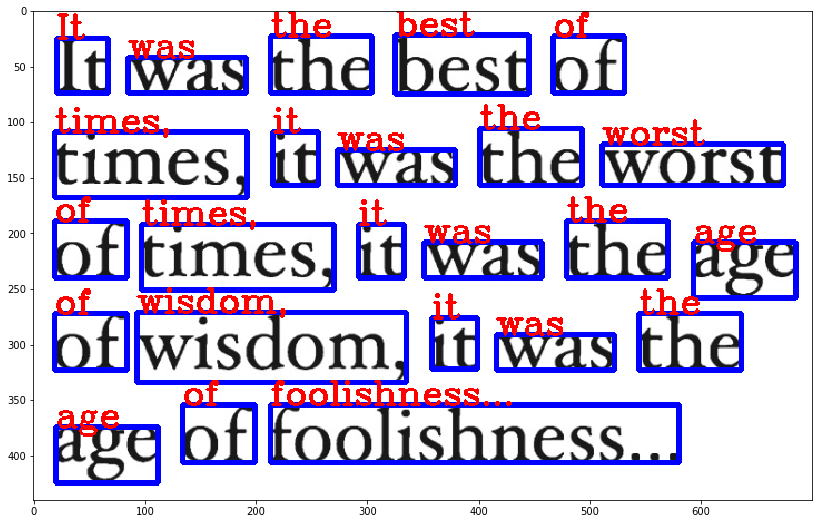

In [56]:
hImg, wImg, d  = img_rgb.shape
boxes = pytesseract.image_to_data(img_rgb)
for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b=b.split()
    if len(b)==12:
        x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
        cv2.rectangle(img_rgb,(x,y),(w+x,h+y),(0,0,255),3)
        cv2.putText(img_rgb,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    
plt.imshow(img_rgb)

# detecting only digits

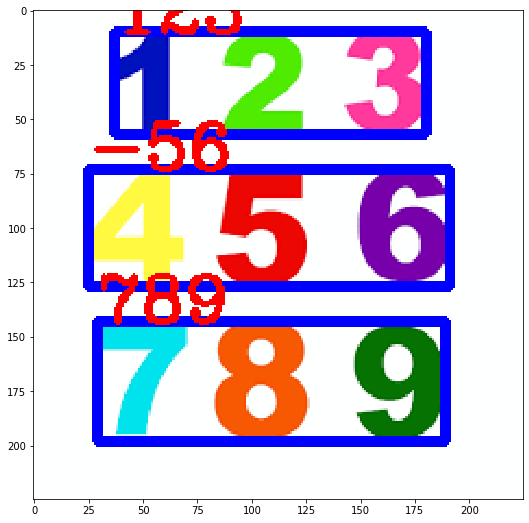

In [63]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd='C:\\Users\\Jayita\\AppData\\Local\\Tesseract-OCR\\tesseract.exe'

img_cv = cv2.imread('num.png')
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

hImg, wImg, d = img_rgb.shape

cong = r'--oem 3 --psm 6 outputbase digits'
boxes = pytesseract.image_to_data(img_rgb,config=cong)

for x,b in enumerate(boxes.splitlines()):
    if x!=0:
        b=b.split()
    if len(b)==12:
        x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
        cv2.rectangle(img_rgb,(x,y),(w+x,h+y),(0,0,255),3)
        cv2.putText(img_rgb,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)

plt.imshow(img_rgb)
